In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# ------------------  Setup and Configuration -------------------
data_dir = 'tea_sickness_dataset' 
img_size = 150 
batch_size = 32  
num_classes = 8 

In [3]:
# ------------------  Data Loading and Augmentation -------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    data_dir, 
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 885 images belonging to 8 classes.
Found 885 images belonging to 8 classes.
Found 885 images belonging to 8 classes.


In [5]:
# --------------------  Model Building ------------------------
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(img_size, img_size, 3)), 
    MaxPooling2D(),
    Conv2D(32, (3,3), activation='relu'), 
    MaxPooling2D(),
    Conv2D(64, (3,3), activation='relu'), 
    MaxPooling2D(),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(), 
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax') 
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\Users\Lenovo\anaconda3\envs\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
# -----------------------  Training --------------------------
epochs = 60 
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)


Epoch 1/60


c:\Users\Lenovo\anaconda3\envs\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/28 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.1428 - loss: 2.0523 - val_accuracy: 0.2554 - val_loss: 1.8331
Epoch 2/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.3334 - loss: 1.6469 - val_accuracy: 0.4621 - val_loss: 1.2267
Epoch 3/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.3626 - loss: 1.2256 - val_accuracy: 0.4271 - val_loss: 1.1646
Epoch 4/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.3482 - loss: 1.3165 - val_accuracy: 0.5017 - val_loss: 1.0934
Epoch 5/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.4508 - loss: 1.1334 - val_accuracy: 0.5345 - val_loss: 1.0923
Epoch 6/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.4967 - loss: 1.0633 - val_accuracy: 0.4825 - val_loss: 1.1104
Epoch 7/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.4891 - loss: 1.0219 - val_accuracy: 0.5514 - val_loss: 1.0074
Epoch 8/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.5135 - loss: 1.0133 - val_accuracy: 0.5254 - val_loss: 1.1004
Epo

28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 764ms/step - accuracy: 0.8897 - loss: 0.2757
Test Accuracy: 0.8915254473686218


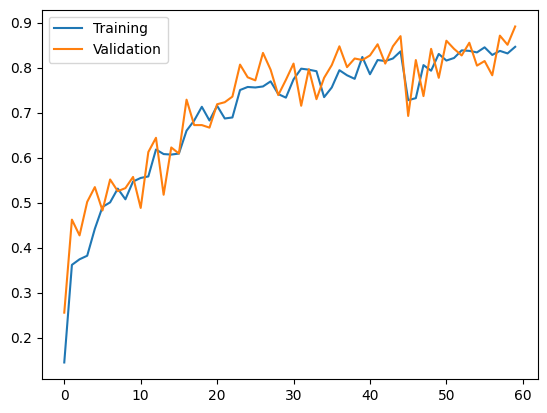

In [7]:
# -----------------  Evaluation ---------------------------
test_loss, test_acc = model.evaluate(validation_generator)
print('Test Accuracy:', test_acc) 

plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

In [8]:
model.save('model_1.h5')